In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string
from sklearn import svm
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import re

2022-04-29 18:00:16.028436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 18:00:16.028461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


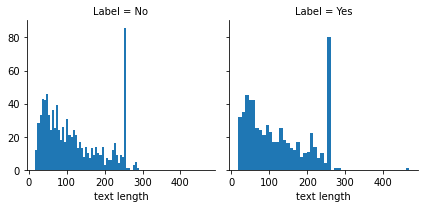

In [3]:
df = pd.read_csv('SWADv1.tsv',sep='\t',error_bad_lines=False)
df['text length'] = df['Tweets'].apply(len)
facegrid = sns.FacetGrid(data=df, col='Label')
facegrid.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='Label', ylabel='text length'>

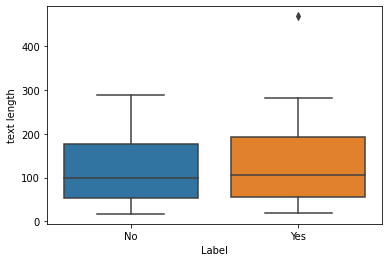

In [4]:
sns.boxplot(x='Label', y='text length', data=df)

<AxesSubplot:>

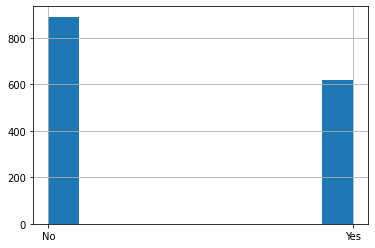

In [5]:
df['Label'].hist()

In [6]:
stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()
def text_process(df):
    df = df.lower()
    df = ' '.join([word for word in df.split(' ') if word not in stop_words])
    df = df.encode('ascii', 'ignore').decode()
    df = re.sub(r'https*\S+', ' ', df)
    df = re.sub(r'@\S+', ' ', df)
    df = re.sub(r'#\S+', ' ', df)
    df = re.sub(r'\'\w+', '', df)
    df = re.sub('[%s]' % re.escape(string.punctuation), ' ', df)
    df = re.sub(r'\w*\d+\w*', '', df)
    df = re.sub(r'\s{2,}', ' ', df)
    return df
df['Tweets'] = df.Tweets.apply(text_process) 
print(df)


        No                                             Tweets Label  \
0        1             someone should piece b shit b volcano     No   
1        2                            oh noes tough b shit b    Yes   
2        3        lol throwing b bullshit b flag nonsense url   Yes   
3        4   da b fuck b going people there men room women...   Yes   
4        5                                          b fuck b    Yes   
...    ...                                                ...   ...   
1506  1507   b hell b location time shooting got anything ...    No   
1507  1508   feel like weird eitherway cuz league supposed...    No   
1508  1509               true pretty b damn b good qb though     No   
1509  1510   real question ted cruz never dropped f bomb l...    No   
1510  1511                   bio relevant piece b shit b ever   Yes   

      text length  
0              72  
1              38  
2             139  
3             116  
4              21  
...           ...  
1506   

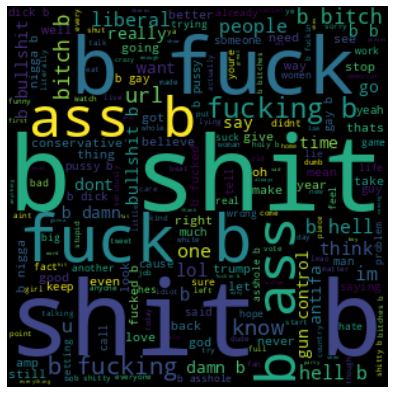

In [7]:
all_words = ' '.join([text for text in df['Tweets'] ])
wordcloud = WordCloud(width=300, height=300, random_state=30, max_font_size=100).generate(all_words)
plt.figure(figsize=(9, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
#Classification of Sentences using SVM using the Linear Kernal trick. Using inbuild classifier of sklearn.
columns = ["Tweets"]
new_data = df[columns]
df["Label"] = df['Label'].replace({'No': 0, 'Yes': 1}).astype(int)
vectorize = CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], df['Label'],random_state=0,test_size=0.2)
document_matrix = vectorize.fit_transform(df['Tweets'])
pd.DataFrame(document_matrix.toarray(),columns = vectorize.get_feature_names())
vectorizer = CountVectorizer(binary=True, stop_words='english')
vectorizer.fit(list(X_train) + list(X_test))
train_vec = vectorizer.transform(X_train)
test_vec = vectorizer.transform(X_test)
svm_classifier = svm.SVC(kernel = 'linear', probability=True)
probability = svm_classifier.fit(train_vec, y_train).predict_proba(test_vec)
y_pred = svm_classifier.predict(test_vec)
report = classification_report(y_test,y_pred)
print(report)
acc_svm_linear = accuracy_score(y_test, y_pred) * 100
print("Accuracy score for SVC is: ", acc_svm_linear, '%')

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       174
           1       0.60      0.53      0.56       129

    accuracy                           0.65       303
   macro avg       0.64      0.63      0.63       303
weighted avg       0.64      0.65      0.64       303

Accuracy score for SVC is:  64.68646864686468 %


In [9]:
#Classification of Sentences using SVM using the Radial basis Kernal trick. Using inbuild classifier of sklearn.
svm_classifier = svm.SVC(kernel = 'rbf', probability=True)
probability = svm_classifier.fit(train_vec, y_train).predict_proba(test_vec)
y_pred = svm_classifier.predict(test_vec)
report = classification_report(y_test,y_pred)
print(report)
acc_svm_radial = accuracy_score(y_test, y_pred) * 100
print("Accuracy score for SVC is: ", acc_svm_radial, '%')

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       174
           1       0.72      0.28      0.40       129

    accuracy                           0.65       303
   macro avg       0.68      0.60      0.58       303
weighted avg       0.67      0.65      0.60       303

Accuracy score for SVC is:  64.68646864686468 %


In [10]:
#Classification of Sentences using SVM using the Polynomial Kernal trick. Using inbuild classifier of sklearn.
svm_classifier = svm.SVC(kernel = 'poly', probability=True)
probability = svm_classifier.fit(train_vec, y_train).predict_proba(test_vec)
y_pred = svm_classifier.predict(test_vec)
report = classification_report(y_test,y_pred)
print(report)
acc_svm_poly = accuracy_score(y_test, y_pred) * 100
print("Accuracy score for SVC is: ", acc_svm_poly, '%')

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       174
           1       0.76      0.10      0.18       129

    accuracy                           0.60       303
   macro avg       0.68      0.54      0.46       303
weighted avg       0.67      0.60      0.50       303

Accuracy score for SVC is:  60.396039603960396 %


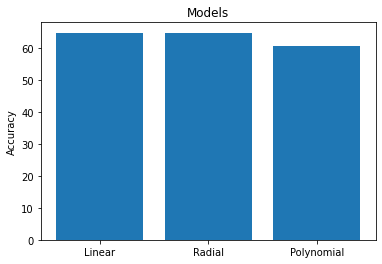

In [11]:
kernels = ['Linear','Radial','Polynomial']
accuracies = [acc_svm_linear,acc_svm_radial,acc_svm_poly]
plt.bar(kernels, accuracies, align='center')
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

In [12]:
clf_Logistic = LogisticRegression(random_state=0)
clf_Logistic.fit(train_vec,y_train)
y_pred = clf_Logistic.predict(test_vec)
report = classification_report(y_test,y_pred)
print(report)
acc_logistic = accuracy_score(y_test,y_pred) * 100
print("Accuracy score for Logistic regression is: ",acc_logistic ,'%')

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       174
           1       0.63      0.45      0.52       129

    accuracy                           0.65       303
   macro avg       0.65      0.63      0.63       303
weighted avg       0.65      0.65      0.64       303

Accuracy score for Logistic regression is:  65.34653465346535 %


In [13]:
x, y = make_classification(n_samples=1400,n_features=2,random_state=0,n_informative=2, n_redundant=0, shuffle=False)
clf_random = RandomForestClassifier(max_depth=2,random_state=0)
clf_random.fit(train_vec,y_train)
y_pred = clf_random.predict(test_vec)
report = classification_report(y_test,y_pred)
print(report)
acc_random = accuracy_score(y_test,y_pred) * 100
print("Accuracy score for Random regression is: ", acc_random,'%')

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       174
           1       0.00      0.00      0.00       129

    accuracy                           0.57       303
   macro avg       0.29      0.50      0.36       303
weighted avg       0.33      0.57      0.42       303

Accuracy score for Random regression is:  57.42574257425742 %


/home/karan/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


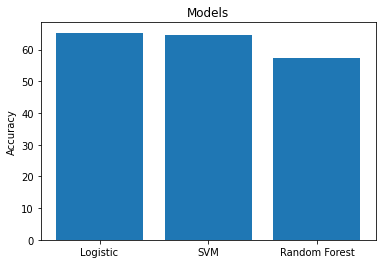

In [14]:
models = ['Logistic','SVM','Random Forest']
accuracies = [acc_logistic,acc_svm_linear,acc_random]
plt.bar(models, accuracies, align='center')
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

In [18]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(8, activation='sigmoid', name="output")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output2")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size = 32)
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)
#acc_random = accuracy_score(y_test,y_pred) * 100
